In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
from seaborn import plt
import seaborn as sns
import matplotlib as mpl
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 10)

In [10]:
import psycopg2
db = psycopg2.connect(
        host = 'ga-analytics-2015.cbh1q304oyvf.us-west-2.rds.amazonaws.com',
        database = 'analytics2015',
        user = 'ostegmaier',
        password = '**************')

In [18]:
#Query to simulate some data
query = '''SELECT 
                fa.actor_id as bid_request_id,
                f.film_id as request_id
            FROM public.film_actor fa 
            LEFT JOIN public.film2 f on f.film_id = fa.film_id '''

df = pd.read_sql(query, db)
df['count_bids'] = 1

In [12]:
df.head()

,bid_request_id,request_id,count_bids
0,1,23,1
1,1,25,1
2,1,106,1
3,1,140,1
4,1,166,1


In [13]:
df2 = pd.pivot_table(df, index=['bid_request_id'], values=['count_bids'], aggfunc=np.sum)
df2.head()

,count_bids
bid_request_id,
1,18
2,25
3,22
4,22
5,29


In [15]:
df3 = pd.DataFrame(df2.count_bids.value_counts(), columns=['Count'])
df3.index.name = 'Bids Per Request'
df3.head()

,Count
Bids Per Request,
25,19
27,17
31,16
30,16
24,14


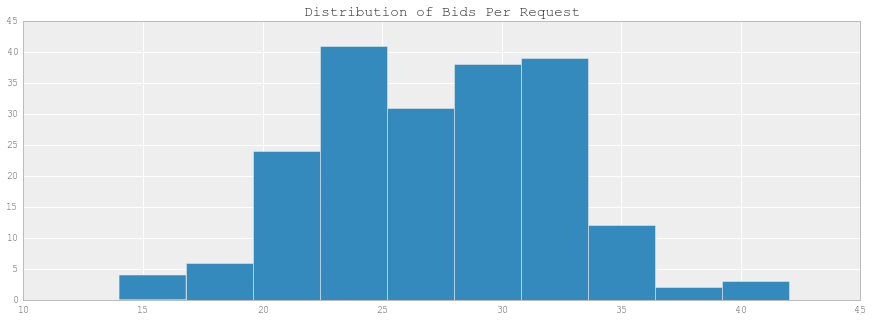

In [17]:
df2.count_bids.hist()
_title = plt.title("Distribution of Bids Per Request")